In [19]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img

In [20]:
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/FRUIT/TRAIN'
test_path = '/content/drive/MyDrive/FRUIT/TEST'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


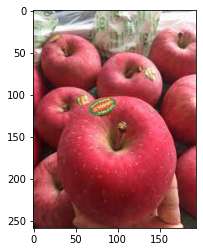

In [21]:
img = load_img('/content/drive/MyDrive/FRUIT/TRAIN/TAO/apple (1).jpg')
plt.imshow(img)

In [22]:
DATADIR = '/content/drive/MyDrive/FRUIT'

In [23]:
cv2.imread('/content/drive/MyDrive/FRUIT/TRAIN/TAO/apple (1).jpg').shape

(259, 194, 3)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_TRAIN = ImageDataGenerator(rescale=1/255)
X_TEST = ImageDataGenerator(rescale=1/255)

In [25]:
TRAIN = X_TRAIN.flow_from_directory(directory=r"/content/drive/MyDrive/FRUIT/TRAIN",target_size=(150, 150),batch_size=10,class_mode="categorical",color_mode="rgb",)
TEST  = X_TEST.flow_from_directory(directory=r"/content/drive/MyDrive/FRUIT/TEST",target_size=(150, 150),batch_size=10,class_mode="categorical",color_mode="rgb",)

Found 454 images belonging to 10 classes.
Found 193 images belonging to 10 classes.


In [26]:
TRAIN.class_indices

{'BO': 0,
 'CAM': 1,
 'CHANHDAY': 2,
 'CHUOI': 3,
 'DUA': 4,
 'DUAHAU': 5,
 'KIWI': 6,
 'TAO': 7,
 'THANHLONG': 8,
 'XOAI': 9}

In [29]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten

model=Sequential()
model.add(Conv2D(13,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(4,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5000,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(2500,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1000,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 13)      364       
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 4)       472       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 4)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 22500)             0         
                                                                 
 dense_25 (Dense)            (None, 1000)              22501000  
                                                                 
 dense_26 (Dense)            (None, 5000)              5005000   
                                                      

In [31]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(TRAIN,epochs=100,batch_size=20,verbose=1,validation_data=TEST)

Epoch 1/100
46/46 [==============================] - 3s 61ms/step - loss: 0.0466 - accuracy: 0.9956 - val_loss: 4.5201 - val_accuracy: 0.6269
Epoch 2/100
46/46 [==============================] - 3s 55ms/step - loss: 0.2934 - accuracy: 0.9846 - val_loss: 6.4595 - val_accuracy: 0.5959
Epoch 3/100
46/46 [==============================] - 3s 57ms/step - loss: 0.2341 - accuracy: 0.9714 - val_loss: 4.0427 - val_accuracy: 0.6010
Epoch 4/100
46/46 [==============================] - 3s 57ms/step - loss: 0.0814 - accuracy: 0.9912 - val_loss: 3.1062 - val_accuracy: 0.6218
Epoch 5/100
46/46 [==============================] - 3s 56ms/step - loss: 0.1193 - accuracy: 0.9890 - val_loss: 4.7067 - val_accuracy: 0.6218
Epoch 6/100
46/46 [==============================] - 3s 57ms/step - loss: 0.3856 - accuracy: 0.9714 - val_loss: 4.0412 - val_accuracy: 0.5596
Epoch 7/100
46/46 [==============================] - 3s 57ms/step - loss: 0.3090 - accuracy: 0.9604 - val_loss: 2.7081 - val_accuracy: 0.6218
Epoch 

In [32]:
model.save('Fruit.h5')

In [33]:
score=model.evaluate(TEST,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])

20/20 [==============================] - 1s 54ms/step - loss: 5.9930 - accuracy: 0.6010
Test loss= 5.992960453033447
Test accuracy= 0.6010362505912781


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

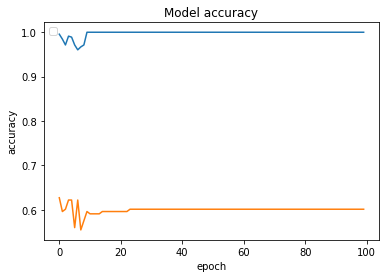

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train','validation',loc='upper left')
plt.show()

In [35]:
from keras.models import load_model
Hello_OPENLAB = load_model('Fruit.h5')

In [36]:
labels = {0: 'BO', 1: 'CAM', 2: 'CHANHDAY', 3: 'CHUOI', 4: 'DUA', 5: 'DUAHAU', 6: 'KIWI', 7: 'TAO', 8: 'THANHLONG', 9: 'XOAI'}

This is:  CAM
Accuracy:  100 %


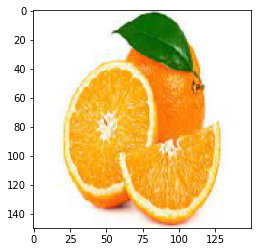

In [43]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/1.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])
print('Accuracy: ', int(np.max(val))*100,'%')

This is:  THANHLONG
Accuracy:  0 %


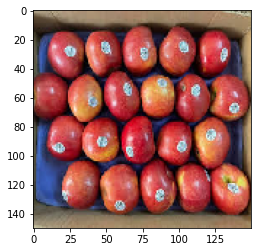

In [46]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/2.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])
print('Accuracy: ', int(np.max(val))*100,'%')

This is:  TAO
Accuracy:  0 %


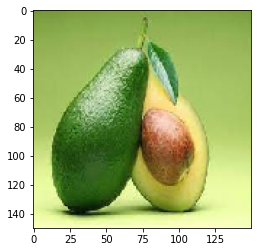

In [45]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/3.jpg', target_size =(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])
print('Accuracy: ', int(np.max(val))*100,'%')